# Lab 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
G=6.67*10**-11 #m^3/kg/s^2
g=9.81 #m/s^2
Me=5.9*10**24 #kg
Mm =7.3*10**22 #kg
Map=5500 #kg
Re=6378*10**3 #m
Rm=1737*10**3 #m
De_m=3.8*10**8 #m
ve=2.4e3 #m/s
m_dot=1.3e4 #kg/s
m0=2.8e6 #kg
mf=7.5e5 #kg


## Part 1

In [70]:
#1
def P(M,xM,yM,x,y):
    r=np.sqrt((x-xM)**2+(y-yM)**2)
    
    return -G*M/r


C:\Users\mario\AppData\Local\Temp\ipykernel_15652\3895989340.py:5: RuntimeWarning: divide by zero encountered in divide
  return -G*M/r


Text(0, 0.5, 'Absolute value of Potential Gravitational (m^2/s^2)')

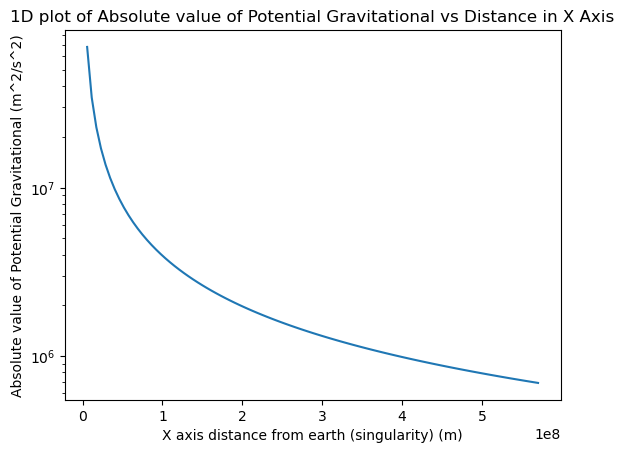

In [71]:
#2
x2=np.linspace(0,1.5*De_m, 100)
fig,ax2=plt.subplots()


Pgraph=P(Me, 0,0,x2,0)

ax2.plot(x2,np.abs(Pgraph))
ax2.set_yscale('log')
ax2.set_title('1D plot of Absolute value of Potential Gravitational vs Distance in X Axis')
ax2.set_xlabel('X axis distance from earth (singularity) (m)')
ax2.set_ylabel('Absolute value of Potential Gravitational (m^2/s^2)')

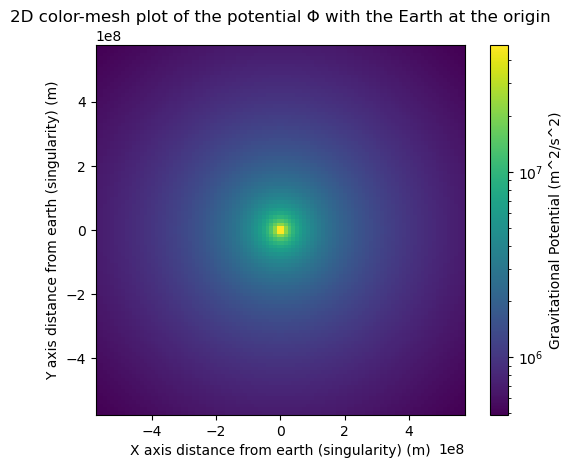

In [5]:
#3
from matplotlib.colors import LogNorm
fig,ax3=plt.subplots()
x3=np.linspace(-1.5*De_m,1.5*De_m, 100)
y3=np.copy(x3)

x_grid, y_grid =np.meshgrid(x3,y3)

F=np.abs(P(Me, 0,0,x_grid, y_grid))
mesh = ax3.pcolormesh(x_grid, y_grid,F,norm=LogNorm())
ax3.set_aspect("equal")

cbar=fig.colorbar(mesh)



ax3.set_xlabel('X axis distance from earth (singularity) (m)')
ax3.set_ylabel('Y axis distance from earth (singularity) (m)')
ax3.set_title('2D color-mesh plot of the potential Φ with the Earth at the origin')
cbar.set_label("Gravitational Potential (m^2/s^2)")

## Part 2

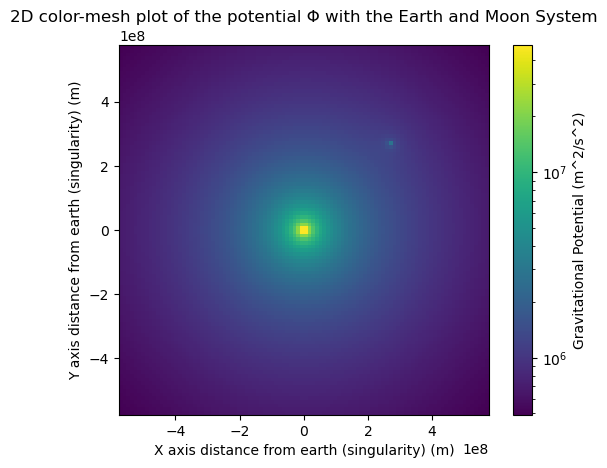

In [6]:
#1
from matplotlib.colors import LogNorm
fig,ax4=plt.subplots()
x4=np.linspace(-1.5*De_m,1.5*De_m, 100)
y4=np.copy(x3)

x_grid, y_grid =np.meshgrid(x4,y4)

F=np.abs(P(Me, 0,0,x_grid, y_grid)+P(Mm,De_m/np.sqrt(2),De_m/np.sqrt(2),x_grid,y_grid))
mesh = ax4.pcolormesh(x_grid, y_grid,F,norm=LogNorm())
ax4.set_aspect("equal")

cbar=fig.colorbar(mesh)



ax4.set_xlabel('X axis distance from earth (singularity) (m)')
ax4.set_ylabel('Y axis distance from earth (singularity) (m)')
ax4.set_title('2D color-mesh plot of the potential Φ with the Earth and Moon System')
cbar.set_label("Gravitational Potential (m^2/s^2)")

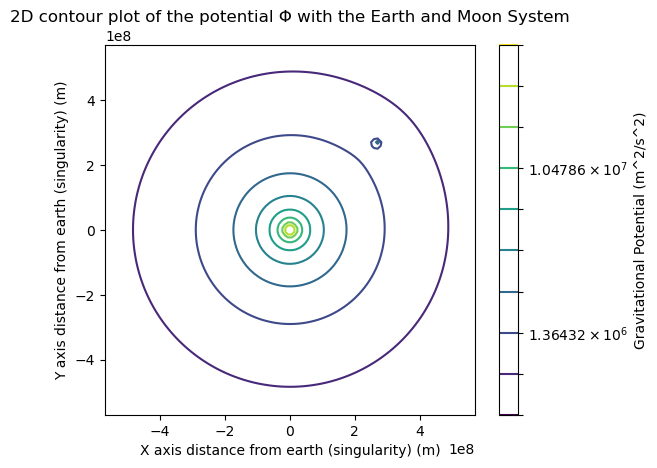

In [7]:
#2
fig,ax5=plt.subplots()
x5=np.linspace(-1.5*De_m,1.5*De_m, 100)
y5=np.copy(x3)

x_grid, y_grid =np.meshgrid(x5,y5)

F=np.abs(P(Me, 0,0,x_grid, y_grid)+P(Mm,De_m/np.sqrt(2),De_m/np.sqrt(2),x_grid,y_grid))
levels = np.logspace(np.log10(np.min(F[F > 0])), np.log10(np.max(F)), num=10)
contour=ax5.contour(x_grid,y_grid,F,levels=levels,norm=LogNorm())

cbar=fig.colorbar(contour)
ax5.set_aspect("equal")


ax5.set_xlabel('X axis distance from earth (singularity) (m)')
ax5.set_ylabel('Y axis distance from earth (singularity) (m)')
ax5.set_title('2D contour plot of the potential Φ with the Earth and Moon System')
cbar.set_label("Gravitational Potential (m^2/s^2)")

## Part 3

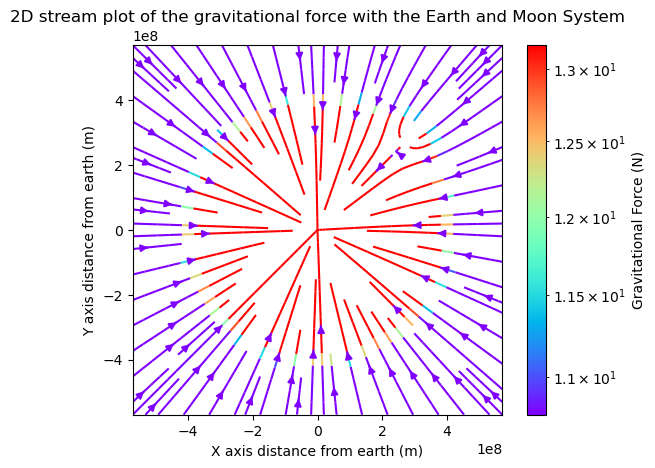

In [73]:
#1
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
def F(M1,m2,x1,y1,x2,y2):
    r=np.sqrt((x2-x1)**2+(y2-y1)**2)
    r=np.where(r==Re,np.nan,r)
    Ftot=-G*M1*m2/r**2
    Ftot=np.where(r<Re,np.nan,Ftot)
    Fx=Ftot*(x2-x1)/r
    Fy=Ftot*(y2-y1)/r
    return Fx, Fy

#2
fig,ax6=plt.subplots()
x6=np.linspace(-1.5*De_m,1.5*De_m, 100)
y6=np.copy(x6)

x_grid, y_grid =np.meshgrid(x6,y6)

Fx=F(Me,Map, 0,0,x_grid, y_grid)[0]+F(Mm,Map,De_m/np.sqrt(2),De_m/np.sqrt(2),x_grid,y_grid)[0]
Fy=F(Me,Map, 0,0,x_grid, y_grid)[1]+F(Mm,Map,De_m/np.sqrt(2),De_m/np.sqrt(2),x_grid,y_grid)[1]


colors=np.sqrt(Fx**2+Fy**2)
stream=ax6.streamplot(x_grid,y_grid,Fx,Fy, color=colors, cmap=cm.rainbow,norm=LogNorm())
cbar = fig.colorbar(stream.lines)

ax6.set_aspect("equal")


ax6.set_xlabel('X axis distance from earth (m)')
ax6.set_ylabel('Y axis distance from earth (m)')
ax6.set_title('2D stream plot of the gravitational force with the Earth and Moon System')
cbar.set_label("Gravitational Force (N)")


## Part 4

In [21]:
#1
T=(m0-mf)/m_dot
print('The burn time of the rocket is', f'{T:.3g}','seconds')

The burn time of the rocket is 158 seconds


Text(0.5, 1.0, 'Change in Velocity vs Time of the Saturn V Rocket')

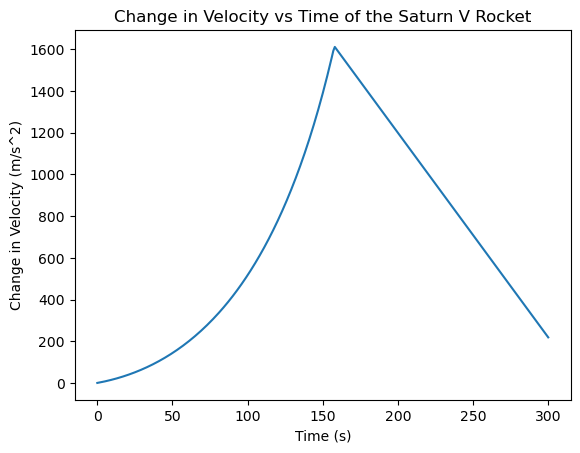

In [53]:
def dv(t,m0,mf,m_dot,ve,g):
    
    mt=m0-m_dot*t
    mt=np.where(mt<mf,mf,mt)
    
    dv_lessT=ve*np.log(m0/(mt))-g*t
    dv_moreT=ve * np.log(m0/mf) - g*T - g*(t - T)
    dv_t=np.where(t>T,dv_moreT,dv_lessT)
   
    return dv_t

t=np.linspace(0,300,301)
fig,ax7=plt.subplots()
ax7.plot(t,dv(t,m0,mf,m_dot,ve,g))

ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Change in Velocity (m/s^2)')
ax7.set_title('Change in Velocity vs Time of the Saturn V Rocket')



In [48]:
#3
from scipy.integrate import quad

def dv(t):
    
    mt=m0-m_dot*t
    mt=np.where(mt<mf,mf,mt)
    
    dv_moreT=ve * np.log(m0 / mf) - g * T - g * (t - T)
    dv_t=np.where(t>T,dv_moreT,ve*np.log(m0/(mt))-g*t)
   
    return dv_t

height,error=quad(dv,0,T)
print('The altitude of the rocket afer time T is',f'{height:.3g}','m')
print('The uncertainty of the altitude of the rocket afer time T is',f'{error:.1g}','m')

The altitude of the rocket afer time T is 7.41e+04 m
The uncertainty of the altitude of the rocket afer time T is 6e-08 m
